# **CSCE 5218 / CSCE 4930 Deep Learning**

# **The Perceptron** (20 pt)


In [74]:
# Get the datasets
!!/usr/bin/curl --output test.dat https://raw.githubusercontent.com/huangyanann/CSCE5218/main/test_small.txt
!!/usr/bin/curl --output train.dat https://raw.githubusercontent.com/huangyanann/CSCE5218/main/train.txt


['  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current',
 '                                 Dload  Upload   Total   Spent    Left  Speed',
 '',
 '  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0',
 '100 11645  100 11645    0     0  41444      0 --:--:-- --:--:-- --:--:-- 41589']

In [75]:
# Take a peek at the datasets
!head train.dat
!head test.dat

A1	A2	A3	A4	A5	A6	A7	A8	A9	A10	A11	A12	A13	
1	1	0	0	0	0	0	0	1	1	0	0	1	0
0	0	1	1	0	1	1	0	0	0	0	0	1	0
0	1	0	1	1	0	1	0	1	1	1	0	1	1
0	0	1	0	0	1	0	1	0	1	1	1	1	0
0	1	0	0	0	0	0	1	1	1	1	1	1	0
0	1	1	1	0	0	0	1	0	1	1	0	1	1
0	1	1	0	0	0	1	0	0	0	0	0	1	0
0	0	0	1	1	0	1	1	1	0	0	0	1	0
0	0	0	0	0	0	1	0	1	0	1	0	1	0
X1	X2	X3
1	1	1	1
0	0	1	1
0	1	1	0
0	1	1	0
0	1	1	0
0	1	1	0
0	1	1	0
0	1	1	0
1	1	1	1


### Build the Perceptron Model

You will need to complete some of the function definitions below.  DO NOT import any other libraries to complete this.

In [76]:
import math
import re

# Function to read and process dataset
def read_data(file_name):
    with open(file_name, 'r') as f:
        data = []
        f.readline()  # Discard header line
        for instance in f.readlines():
            if not re.search('\t', instance):
                continue
            instance = list(map(int, instance.strip().split('\t')))
            # Add a bias term (-1) as the first element
            instance = [-1] + instance
            data.append(instance)
    return data

# Function to compute dot product
def dot_product(array1, array2):
    return sum(a * b for a, b in zip(array1, array2))

# Sigmoid activation function
def sigmoid(x):
    return 1 / (1 + math.exp(-x))

# Compute the perceptron output
def output(weights, instance):
    return sigmoid(dot_product(weights, instance))

# Predict the label using the perceptron model
def predict(weights, instance):
    return 1 if output(weights, instance) >= 0.5 else 0

# Compute accuracy
def get_accuracy(weights, instances):
    correct = sum(1 for instance in instances if predict(weights, instance) == instance[-1])
    return correct * 100 / len(instances)

# Train the perceptron model
def train_perceptron(instances, lr, epochs):
    # Initializing the weights to zero
    weights = [0] * (len(instances[0]) - 1)

    for _ in range(epochs):
        for instance in instances:
            # Computing the weighted sum which is dot product
            in_value = dot_product(weights, instance)
            # Computing the output utilizing the sigmoid of the input
            out = sigmoid(in_value)
            # Computing the error using target-output
            error = instance[-1] - out
            # Updating the weights utilizing gradient descent and learning rate
            for i in range(len(weights)):
                weights[i] += lr * error * out * (1 - out) * instance[i]
    #printing(weights, weights,lr * error * output * (1-output) * instance[i])
    return weights


## Run it

In [77]:
instances_tr = read_data("train.dat")
instances_te = read_data("test.dat")
lr = 0.005
epochs = 5
weights = train_perceptron(instances_tr, lr, epochs)
accuracy = get_accuracy(weights, instances_te)
print(f"#tr: {len(instances_tr):3}, epochs: {epochs:3}, learning rate: {lr:.3f}; "
      f"Accuracy (test, {len(instances_te)} instances): {accuracy:.1f}")

#tr: 400, epochs:   5, learning rate: 0.005; Accuracy (test, 14 instances): 71.4


## Questions

Answer the following questions. Include your implementation and the output for each question.



### Question 1

In `train_perceptron(instances, lr, epochs)`, we have the follosing code:
```
in_value = dot_product(weights, instance)
output = sigmoid(in_value)
error = instance[-1] - output
```

Why don't we have the following code snippet instead?
```
output = predict(weights, instance)
error = instance[-1] - output
```

#### TODO Add your answer here (text only)




In the given code snippet 1 it correctly calculates an output that is continuous utilizing the function which is sigmoid by giving smooth gradient-based weight updates. whereas the code snippet 2 which is predict () it will return only 1 or 0 leaving the outcome discrete and non-differentiable. while gradient descent is utilized in training the perception. A function that is distinct such as the sigmoid must be used in order to quickly assess the error and adjust the weights. since predict () function ignores the gradient information, which is necessary, this might prevent proper learning. For the final result the first function provides regular updates permitting efficient and seamless convergence during the training process.

### Question 2
Train the perceptron with the following hyperparameters and calculate the accuracy with the test dataset.

```
tr_percent = [5, 10, 25, 50, 75, 100] # percent of the training dataset to train with
num_epochs = [5, 10, 20, 50, 100]              # number of epochs
lr = [0.005, 0.01, 0.05]              # learning rate
```

TODO: Write your code below and include the output at the end of each training loop (NOT AFTER EACH EPOCH)
of your code.The output should look like the following:
```
# tr:  20, epochs:   5, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
# tr:  20, epochs:  10, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
# tr:  20, epochs:  20, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
[and so on for all the combinations]
```
You will get different results with different hyperparameters.

#### TODO Add your answer here (code and output in the format above)


In [78]:
instances_tr = read_data("train.dat")
instances_te = read_data("test.dat")
tr_percent = [5, 10, 25, 50, 75, 100]  # percent of the training dataset to train with
num_epochs = [5, 10, 20, 50, 100]  # number of epochs
lr_array = [0.005, 0.01, 0.05]  # learning rate
values_for_accuracy = {}

for size in tr_percent:
    preinstances=instances_tr[:len(instances_tr*size)//100]
    for lr in lr_array:
        for epochs in num_epochs:
            weights = train_perceptron(preinstances, lr, epochs)
            accuracy = get_accuracy(weights, instances_te)

            print(f"# tr: {len(preinstances):3}, epochs: {epochs:3}, learning rate: {lr:.3f}; "
                  f"Accuracy (test, {len(instances_te)} instances): {accuracy:.1f}")
            values_for_accuracy[(size, lr, epochs)] = accuracy

# tr:  20, epochs:   5, learning rate: 0.005; Accuracy (test, 14 instances): 71.4
# tr:  20, epochs:  10, learning rate: 0.005; Accuracy (test, 14 instances): 71.4
# tr:  20, epochs:  20, learning rate: 0.005; Accuracy (test, 14 instances): 71.4
# tr:  20, epochs:  50, learning rate: 0.005; Accuracy (test, 14 instances): 71.4
# tr:  20, epochs: 100, learning rate: 0.005; Accuracy (test, 14 instances): 85.7
# tr:  20, epochs:   5, learning rate: 0.010; Accuracy (test, 14 instances): 71.4
# tr:  20, epochs:  10, learning rate: 0.010; Accuracy (test, 14 instances): 71.4
# tr:  20, epochs:  20, learning rate: 0.010; Accuracy (test, 14 instances): 71.4
# tr:  20, epochs:  50, learning rate: 0.010; Accuracy (test, 14 instances): 85.7
# tr:  20, epochs: 100, learning rate: 0.010; Accuracy (test, 14 instances): 42.9
# tr:  20, epochs:   5, learning rate: 0.050; Accuracy (test, 14 instances): 71.4
# tr:  20, epochs:  10, learning rate: 0.050; Accuracy (test, 14 instances): 85.7
# tr:  20, epoch

In [79]:
instances_tr = read_data("train.dat")
instances_te = read_data("test.dat")
tr_percent = [5, 10, 25, 50, 75, 100] # percent of the training dataset to train with
num_epochs = [5, 10, 20, 50, 100]     # number of epochs
lr_array = [0.005, 0.01, 0.05]        # learning rate

for lr in lr_array:
  for tr_size in tr_percent:
    for epochs in num_epochs:
      size =  round(len(instances_tr)*tr_size/100)
      pre_instances = instances_tr[0:size]
      weights = train_perceptron(pre_instances, lr, epochs)
      accuracy = get_accuracy(weights, instances_te)
    print(f"#tr: {len(pre_instances):0}, epochs: {epochs:3}, learning rate: {lr:.3f}; "
            f"Accuracy (test, {len(instances_te)} instances): {accuracy:.1f}")

#tr: 20, epochs: 100, learning rate: 0.005; Accuracy (test, 14 instances): 85.7
#tr: 40, epochs: 100, learning rate: 0.005; Accuracy (test, 14 instances): 71.4
#tr: 100, epochs: 100, learning rate: 0.005; Accuracy (test, 14 instances): 71.4
#tr: 200, epochs: 100, learning rate: 0.005; Accuracy (test, 14 instances): 85.7
#tr: 300, epochs: 100, learning rate: 0.005; Accuracy (test, 14 instances): 85.7
#tr: 400, epochs: 100, learning rate: 0.005; Accuracy (test, 14 instances): 71.4
#tr: 20, epochs: 100, learning rate: 0.010; Accuracy (test, 14 instances): 42.9
#tr: 40, epochs: 100, learning rate: 0.010; Accuracy (test, 14 instances): 85.7
#tr: 100, epochs: 100, learning rate: 0.010; Accuracy (test, 14 instances): 28.6
#tr: 200, epochs: 100, learning rate: 0.010; Accuracy (test, 14 instances): 85.7
#tr: 300, epochs: 100, learning rate: 0.010; Accuracy (test, 14 instances): 85.7
#tr: 400, epochs: 100, learning rate: 0.010; Accuracy (test, 14 instances): 71.4
#tr: 20, epochs: 100, learning r

### Question 3
Write a couple paragraphs interpreting the results with all the combinations of hyperparameters. Drawing a plot will probably help you make a point. In particular, answer the following:
- A. Do you need to train with all the training dataset to get the highest accuracy with the test dataset?
- B. How do you justify that training the second run obtains worse accuracy than the first one (despite the second one uses more training data)?
   ```
#tr: 100, epochs:  20, learning rate: 0.050; Accuracy (test, 100 instances): 71.0
#tr: 200, epochs:  20, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
```
- C. Can you get higher accuracy with additional hyperparameters (higher than `80.0`)?
- D. Is it always worth training for more epochs (while keeping all other hyperparameters fixed)?

#### TODO: Add your answer here (code and text)



When evaluating the results for the hyperparameters combinations it indicates clear that enhancing the training data simply doesn't sufficient to get the test accuracy which is ideal. Suppose learning rate which is higher the model will converge quickly but it also quickly chances of exceeding the ideal weights. That could lead to instability. No, we will talk about the slower convergence it will occur because of the learning rate which is lower now if we have the lower learning, we have the more stable learning process could be achieved. The result will be affected if we have too many epochs it will lead to overfitting and if we have a smaller number of epochs it will lead to underfitting. In which model perform well on the training data and poorly on the testing data







3.A.

For the first question the answer is no if u want to attain the best accuracy for the testing. It is not necessarily required to train utilizing the whole training dataset. All the other hyperparameters are going to impact the results. To avoid the situation of overfitting maybe a smaller portion of the data which is training might be sufficient in certain situations.



3.B

For the second question the answer is although utilizing more data for the training the second run performance is decreased because of the learning rate-0.005 which is lower. convergence which is slower due to a lower learning rate, so the model could not have sufficient iterations to correctly change the weights with only 20 epochs and the opposite the model was capable to acquire knowledge more effectively in the exact same no of epochs because to the first run as highest learning rate compared to second run which is 0.05. This shows how optimal accuracy is achieved. It demands finding the suitable balance between the rate of learning, size of the data and epochs.



3.C

For the third question the answer is yes if u have more hyperparameter modification it can lead to better accuracy than the previous hyperparameters. It might involve trying with different counts for the epoch and changing the learning rates. if it is essential to alter the model architecture. Additionally better results could potentially come from feature engineering or preparing the data.



3.D

For the fourth question the answer is no, the training for the additional epochs is not always advantageous. The utilized model could eventually begin to overfit the training set; therefore, it would reduce the test accuracy. The rate of learning and complexity for the data determines the optimum number of epochs.



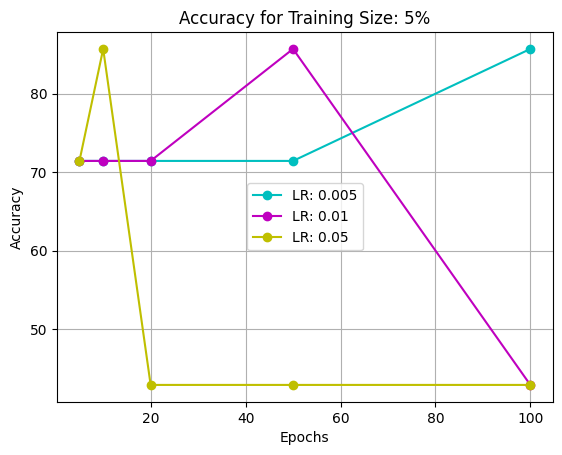

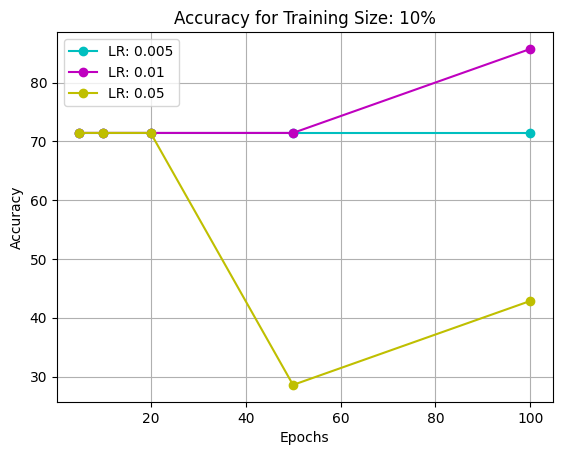

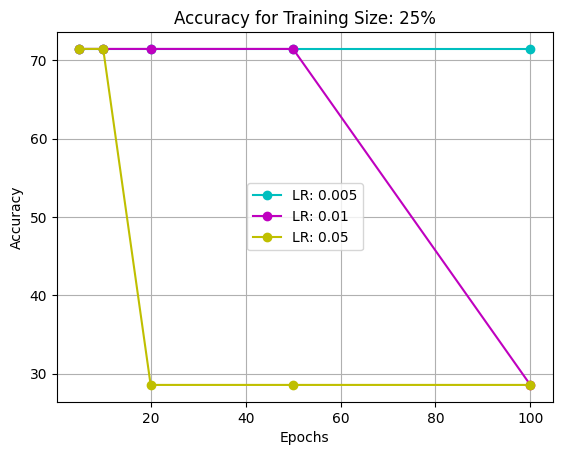

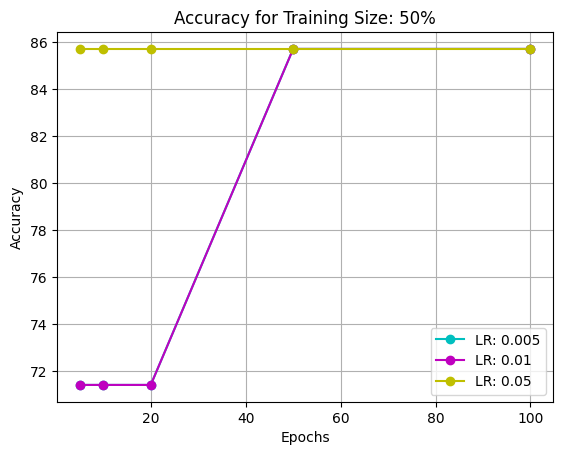

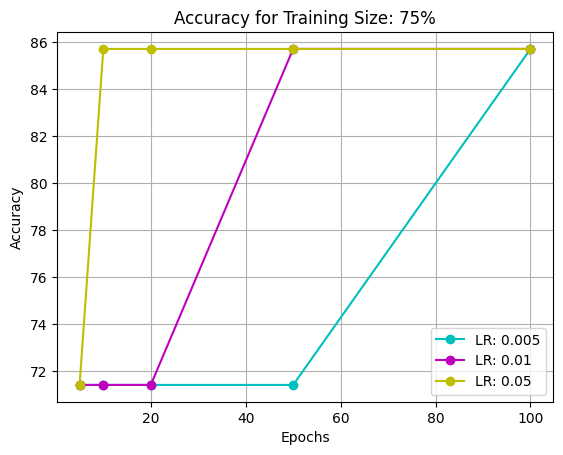

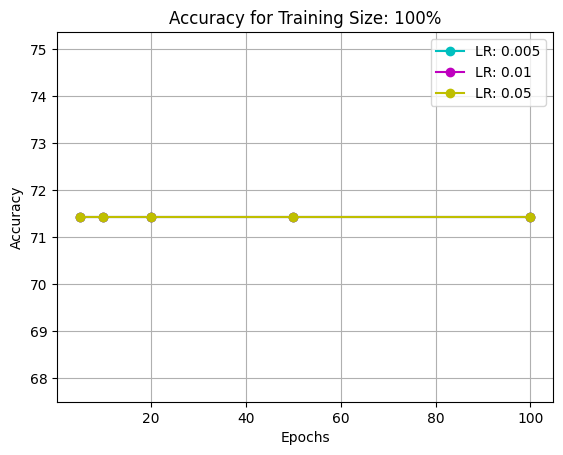

In [80]:
import matplotlib.pyplot as plt
import numpy as np

colors = ['c', 'm', 'y']

for size in tr_percent:
    plt.figure()
    plt.title(f"Accuracy for Training Size: {size}%")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")

    for i, lr in enumerate(lr_array):
        accuracies = [values_for_accuracy[(size, lr, epochs)] for epochs in num_epochs]
        plt.plot(num_epochs, accuracies, marker='o', linestyle='-', color=colors[i % len(colors)], label=f"LR: {lr}")

    plt.legend()
    plt.grid(True)
    plt.show()